In [1]:
from __future__ import print_function
import os

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ingestión de datos and Data Cleaning

In [2]:
data_path = ['data']
file_name = 'Vuelos.csv'
filepath = os.sep.join(data_path + [file_name])

dataset = pd.read_csv(filepath, low_memory=False)#.drop(columns=["Unnamed: 0"])

The first 5 observations are presented and the dimension of the dataset. We notice now tha amount of observations is way higher than the amount of features, which it's quite positve when we apply stadistics models.

In [3]:
display(dataset.shape)
display(dataset.head(5))

(480085, 38)

,Unnamed: 0,MONTH,DAY_OF_MONTH,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_WAC,...,ACTUAL_ELAPSED_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 36
0,0,8,31,2017-08-31,F9,LGA,"New York, NY",NY,New York,22,...,175.0,1.0,762.0,4,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8,2,2017-08-02,WN,STL,"St. Louis, MO",MO,Missouri,64,...,NaN,1.0,888.0,4,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8,2,2017-08-02,WN,STL,"St. Louis, MO",MO,Missouri,64,...,138.0,1.0,888.0,4,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8,2,2017-08-02,WN,STL,"St. Louis, MO",MO,Missouri,64,...,166.0,1.0,888.0,4,0.0,39.0,26.0,0.0,44.0,NaN
4,4,8,2,2017-08-02,WN,TPA,"Tampa, FL",FL,Florida,33,...,NaN,1.0,1130.0,5,NaN,NaN,NaN,NaN,NaN,NaN


We can see the presence of two features without name _"Unnamed: 0"_ and _"Unnamed: 36"_. In the case of the frist feature it seems to fullfil a function of order, an index of some sort, as we already have the index loaded by default by pandas if we confirm our hypothesis then the column can be removed. The second feauture seems to be full of 'NaN' values.

In [4]:
display(pd.Series(dataset.index).equals(dataset["Unnamed: 0"]))

display(dataset["Unnamed: 36"].isna().all())

display(dataset['FLIGHTS'].equals(pd.Series(np.ones(480085))))


True

True

True

We can see now that the _`Unnamed: 0`_ column was indeed an index therefore we dropped it, also _`Unnamed: 36`_ only has _NAN_ values  hence we concluded that it is imposible to get information from it and we dropped it as well. We showed that the `FLIGHTS` feature was just a column of ones, this is probably because the flights we have in the dataset are just the internal flights hence we are not getting any information from it so we drop it as well.

In [5]:
#Eliminamos las columnas que no aportan información
dataset = dataset.drop(columns=['Unnamed: 36','Unnamed: 0'])

It may be interesting to see how many `NaN` values each feature has.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480085 entries, 0 to 480084
Data columns (total 36 columns):
MONTH                  480085 non-null int64
DAY_OF_MONTH           480085 non-null int64
FL_DATE                480085 non-null object
UNIQUE_CARRIER         480085 non-null object
ORIGIN                 480085 non-null object
ORIGIN_CITY_NAME       480085 non-null object
ORIGIN_STATE_ABR       480085 non-null object
ORIGIN_STATE_NM        480085 non-null object
ORIGIN_WAC             480085 non-null int64
DEST                   480085 non-null object
DEST_CITY_NAME         480085 non-null object
DEST_STATE_ABR         480085 non-null object
DEST_STATE_NM          480085 non-null object
DEST_WAC               480085 non-null int64
DEP_TIME               468246 non-null float64
DEP_DELAY              468236 non-null float64
DEP_DELAY_NEW          468236 non-null float64
DEP_DEL15              468236 non-null float64
DEP_DELAY_GROUP        468236 non-null float64
DEP_TIME_BLK  

An important pattern we noticed is that the variables related to delay causes are those that show a higher amount of `NaN` values, actually, all of them have the same amount of `NaN` values, this lead us to consider the possibility that a `NaN` value means that there was no delay at all or the delay was considered acceptable and because of this they didn't register anything about the delay cause, this hypotesis will become more relevant once we see the next result.

In [7]:
#Agregar función que confirme en su gran mayoría cuando delay es positivo entonces los valores de los motivos son no-nulos
mascara = dataset['ARR_DELAY']>30 
mascara2 = dataset['DEP_DELAY']>30 
mascara3 = mascara | mascara2
tabla = dataset[mascara3].info()

del mascara,mascara2,mascara3, tabla

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85983 entries, 3 to 480080
Data columns (total 36 columns):
MONTH                  85983 non-null int64
DAY_OF_MONTH           85983 non-null int64
FL_DATE                85983 non-null object
UNIQUE_CARRIER         85983 non-null object
ORIGIN                 85983 non-null object
ORIGIN_CITY_NAME       85983 non-null object
ORIGIN_STATE_ABR       85983 non-null object
ORIGIN_STATE_NM        85983 non-null object
ORIGIN_WAC             85983 non-null int64
DEST                   85983 non-null object
DEST_CITY_NAME         85983 non-null object
DEST_STATE_ABR         85983 non-null object
DEST_STATE_NM          85983 non-null object
DEST_WAC               85983 non-null int64
DEP_TIME               85983 non-null float64
DEP_DELAY              85983 non-null float64
DEP_DELAY_NEW          85983 non-null float64
DEP_DEL15              85983 non-null float64
DEP_DELAY_GROUP        85983 non-null float64
DEP_TIME_BLK           85983 non-n

The results we got when we only considered the subset of observations in which there was a delay over 30 minutes are just as we expected them to be. We can see that most of the observations have their delay cause registered, actually, the higher the delay is the more `non-null values` you get in the features we are studying. This result makes us think that probably airports have to register very well every reason why they are falling behind the schedule but when the delay isn't that much it's not that important to register the cause.

# Delay Analysis

Now we are going focus our attention into the features related to delays. First of all observe that the feature _"ARR_DELAY"_ uses negative numbers to register also the arrivals that ocurred before the programed hour. Those negative numbers make difficult to apply some functions we need to analyze the data (e.g. when mean is calculated), because of this the need arrises to create a new column similar to _"DEP_DELAY_NEW"_ which we put 0 when the plane arrives earlier, this way it only focuses on delays. We will call this variable  _"ARR_DELAY_NEW"_.

In [8]:
temp = dataset['ARR_DELAY'].copy()
temp[temp < 0] = 0 
dataset['ARR_DELAY_NEW'] = temp
del temp

To begin the analysis we'll need do something about the null values. Our next result is going to help us with this. 

,DEP_DELAY_NEW,ARR_DELAY_NEW
count,468236.000000,466352.000000
mean,18.434883,18.213442
std,53.125508,52.307365
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,11.000000,12.000000
max,1685.000000,1589.000000


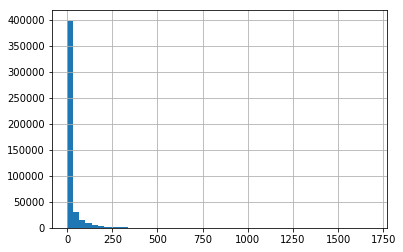

In [9]:
desc_columns = [16,36]
desc = dataset.iloc[:, desc_columns]
display(desc.describe())
#Graficarlos a los 2 por separado
desc['DEP_DELAY_NEW'].dropna().hist(bins=50)
#desc['ARR_DELAY_NEW'].dropna().hist(bins=30)

From the last result we see that more than a 50% of the data says there was no delay. Going further we would like to say something about the average time a flight may be delayed but given the high variance of both features we studied it would't be trustworthy to use the mean as an aproximation for that. What we conclude is that most of the flights do not fall behind on schedule but when they do the time it takes vary quite a lot.

In order to find more patterns related to delays we are going to analyze the next table.

In [10]:
desc_columns = [0,15,16,17,18,21,22,23,25,26,27,29,30,31,32,33,34,35,36]
desc = dataset.iloc[:, desc_columns]
display(desc.describe())

,MONTH,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY_NEW
count,480085.000000,468236.000000,468236.000000,468236.000000,468236.000000,466352.000000,466352.000000,466352.000000,480085.000000,480085.000000,466352.000000,480085.000000,480085.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,466352.000000
mean,6.522522,15.403781,18.434883,0.228346,0.354919,7.607076,0.229505,-0.008286,0.025502,0.003114,175.038833,1068.561001,4.750365,21.397132,2.799981,25.117416,0.113856,26.045772,18.213442
std,3.404854,54.283760,53.125508,0.419767,2.649006,57.109182,0.420515,2.832210,0.157643,0.055717,89.470467,717.577157,2.759537,65.068146,23.860263,48.045493,2.968468,51.109784,52.307365
min,1.000000,-84.000000,0.000000,0.000000,-2.000000,-98.000000,0.000000,-2.000000,0.000000,0.000000,37.000000,75.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,-5.000000,0.000000,0.000000,-1.000000,-18.000000,0.000000,-2.000000,0.000000,0.000000,112.000000,544.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,-2.000000,0.000000,0.000000,-1.000000,-7.000000,0.000000,-1.000000,0.000000,0.000000,155.000000,950.000000,4.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
75%,9.000000,11.000000,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,210.000000,1389.000000,6.000000,18.000000,0.000000,29.000000,0.000000,31.000000,12.000000
max,12.000000,1685.000000,1685.000000,1.000000,12.000000,1589.000000,1.000000,12.000000,1.000000,1.000000,784.000000,4983.000000,11.000000,1548.000000,1112.000000,1276.000000,292.000000,1240.000000,1589.000000


From the table above we can conclude:

- The block of months with more delays are july, august and september.
- More than a 50% of the flights ocurrs earlier than the hour scheduled, however, we can see that the mean of "DEP_DELAY" is positive which means that the time registered on delays is higher than the time registered because of early departures. This actually makes sense since normally a flight shouldn't be leaving before the time scheduled(otherwise some people wouldn´t be able to take the flight they payed for), on the other hand the time loss because of a delay depends pretty much on the cause. We can confirm what we just said by looking at the max and min values from the table above.
- By looking at "DEP_DEL15" and "ARR_DEL15" we can see that less than a 25% of the flights are delayed for more than 15min, neither in the departure nor the arrival.
- We conclude that normally diverted flights are not something very likely to happen. Notice that the feature 1 when there is a diverted flight and 0 when there's not, because of this the mean is actually the proportion of flights who were diverted so approximately only a 0.3% of the flights were diverted.
- We observe that security and weather are the causes least frequents in delay causes.

It may be of interest to find the states that visit New York the most.

,Frequencia,Frequencia relativa (%%)
Florida,56632,23.082504
California,25346,10.330717
Illinois,21082,8.592763
Georgia,18920,7.711558
North Carolina,13525,5.512623
Massachusetts,13229,5.391977
Texas,13153,5.361000
New York,10632,4.333472
Michigan,10421,4.247471
Maryland,6543,2.666846


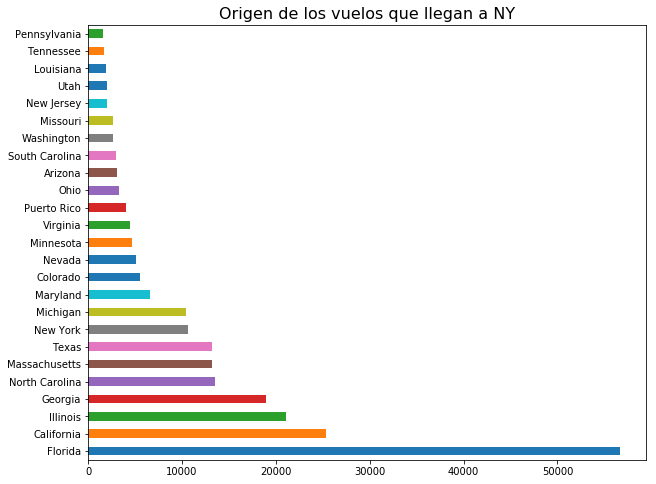

In [11]:
temp = dataset[dataset.DEST_STATE_ABR == 'NY'] #Filtro que permite centrarnos unicamente en los vuelos que se dirigen a NY

origin_flights = pd.DataFrame()
origin_flights["Frequencia"] = pd.value_counts(temp['ORIGIN_STATE_NM'])
origin_flights["Frequencia relativa (%%)"] = 100 * temp['ORIGIN_STATE_NM'].value_counts(normalize=True)
display(origin_flights.head(25))

f, ax = plt.subplots(1,1, figsize=(10,8))
ax = temp['ORIGIN_STATE_NM'].value_counts().head(25).plot(kind='barh', ax=ax)
ax.set_title('Origen de los vuelos que llegan a NY', fontsize=16)
plt.show()

We can see that the big majority of flights with destiny to New York come from `Florida` with more than 50.000 flights which is twice the number of flights from `California` (second state with more flights coming to `NY`)

It may be worth to study the amount of flights coming to `New York` in the different states of the year.

In [12]:
#Podriamos cambiarla a que no lo diga por estado, solo en total. Y hacerlo hacerlo por epoca del año como primavera y asi
pd.crosstab(index=temp['ORIGIN_STATE_NM'], columns=temp['MONTH'], margins=True)

MONTH,1,2,3,4,5,6,7,8,9,10,11,12,All
ORIGIN_STATE_NM,,,,,,,,,,,,,
Alabama,39,41,54,26,42,44,37,41,30,39,10,33,436
Arizona,251,244,303,292,271,262,266,260,225,247,230,249,3100
Arkansas,20,22,27,25,25,26,20,27,23,27,6,17,265
California,2081,1904,2228,2120,2139,2121,2201,2256,2032,2145,2034,2085,25346
Colorado,429,393,473,413,471,507,538,541,469,484,406,445,5569
Florida,4903,4532,5576,5279,4711,4464,4540,4513,3970,4296,4609,5239,56632
Georgia,1496,1370,1623,1579,1656,1605,1634,1665,1550,1634,1561,1547,18920
Hawaii,52,45,49,30,31,30,31,31,30,29,27,40,425
Illinois,1435,1349,1595,1477,1767,1961,2050,2121,1853,2000,1757,1717,21082


We can look for patterns in the proportion of flights coming to `New York` divind the year in `months`.

In [13]:
#Distribución de los vuelos con destino a NY durante el año.
temp2 = 100 * temp['MONTH'].value_counts(normalize=True).to_frame()

temp2.columns = ['Frecuencia relativa en (%)']
display(temp2)

,Frecuencia relativa en (%)
8,8.924947
3,8.844652
7,8.700366
5,8.575237
6,8.570346
10,8.493719
4,8.305821
12,8.186806
11,8.049449
9,7.998500


We find 2 important observations:
- It seems like the begining or the end of the year does not represent a big change in the quantity of flights coming to `New York`.
- In general it looks like the quantity of flights coming to `New York` does not change too much depending on the `month`.

Let's analyze now the states who are visited the most from the `New York`'s airports.

In [14]:
#Proporción de viajes a cada una de las ciudades del estado NY 
temp2 = 100 * temp['DEST_STATE_NM'].value_counts(normalize=True).to_frame()
temp2.columns = ['Frecuencia relativa (%)']
display(temp2.head())
del temp2#, mascara

,Frecuencia relativa (%)
New York,100.0


We observe that most of the flights coming from `New York` have destiny to `Florida`, even more, the states were people go the most from `New York` are the same states who visit `New York` the most as well. This is interesting but at the same time makes sense, we can expect that people who live in `Florida` for example and visit `New York` would need to go back home in less than a year and the same thing functions for people who live in `New York` and visit `Florida`.

,Frecuencia,Frecuencia Relativa (en %)
New York,245346,100.0


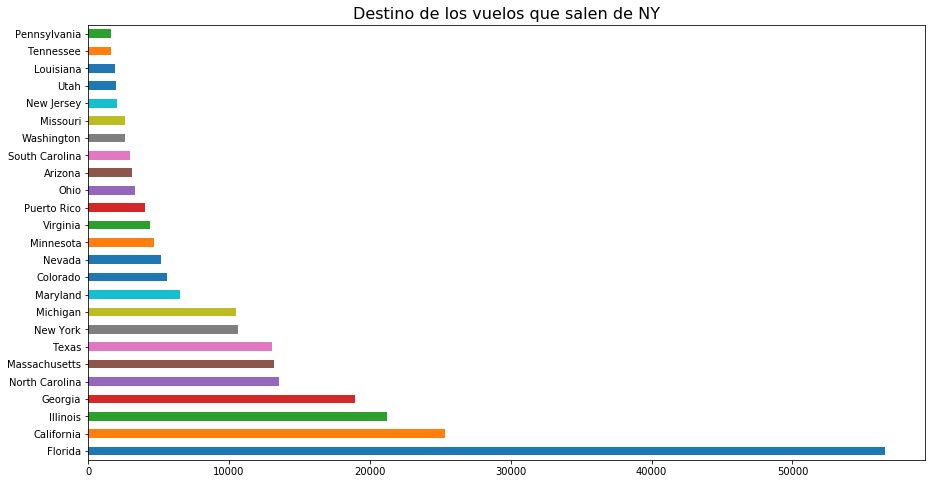

In [15]:
#Tabla de frecuencia de ciudades de destino.
dest_flights = pd.DataFrame()
dest_flights["Frequency"] = pd.value_counts(temp['DEST_STATE_NM'])
dest_flights["Relative frequency (%%)"] = 100 * temp['DEST_STATE_NM'].value_counts(normalize=True)
dest_flights.columns = ['Frecuencia' , 'Frecuencia Relativa (en %)']
display(dest_flights.head())

temp = dataset[dataset['ORIGIN_STATE_ABR']=='NY'] #Filtro que permite centrarnos unicamente en los vuelos que salen de NY

f, ax = plt.subplots(1,1, figsize=(15, 8))
ax = temp['DEST_STATE_NM'].value_counts().head(25).plot(kind='barh', ax=ax)
ax.set_title('Destino de los vuelos que salen de NY', fontsize=16)
plt.show()

In [16]:
# Tabla de contingencia Destino / Mes
pd.crosstab(index=temp['DEST_STATE_NM'],
            columns=temp['MONTH'], margins=True)

MONTH,1,2,3,4,5,6,7,8,9,10,11,12,All
DEST_STATE_NM,,,,,,,,,,,,,
Alabama,39,41,54,26,42,44,37,41,30,39,10,33,436
Arizona,252,244,303,292,271,262,266,259,225,247,230,249,3100
Arkansas,20,22,27,25,25,25,20,27,23,27,6,17,264
California,2081,1903,2227,2121,2141,2122,2203,2256,2033,2145,2035,2085,25352
Colorado,424,390,469,411,467,530,568,554,467,481,405,446,5612
Florida,4882,4530,5574,5274,4704,4464,4537,4511,3970,4297,4604,5248,56595
Georgia,1498,1368,1623,1576,1654,1604,1633,1667,1554,1637,1560,1538,18912
Hawaii,52,44,49,30,31,30,31,31,30,29,27,40,424
Illinois,1445,1366,1606,1517,1792,1974,2062,2130,1858,2007,1756,1716,21229


In [17]:
#Distribución de los vuelos con origen en NY durante el año.
temp2 = 100 * temp['MONTH'].value_counts(normalize=True).to_frame()
temp2.columns = ['Frecuencia relativa en (%)']
display(temp2)

,Frecuencia relativa en (%)
8,8.923630
3,8.841306
7,8.701110
6,8.574363
5,8.574363
10,8.496522
4,8.303752
12,8.187194
11,8.048628
9,7.998093


In [18]:
#Tabla de freciencia de vuelos cancelados
tabla = pd.value_counts(dataset['CANCELLED']).to_frame()
tabla["Frecuencia Relativa (en %)"] = 100 * dataset['CANCELLED'].value_counts(normalize=True)
tabla.columns = ['Frecuencia' , 'Frecuencia Relativa (en %)']
tabla.index = ['No se cancelo',"Se canceló"]
display(tabla)

del tabla

,Frecuencia,Frecuencia Relativa (en %)
No se cancelo,467842,97.449827
Se canceló,12243,2.550173


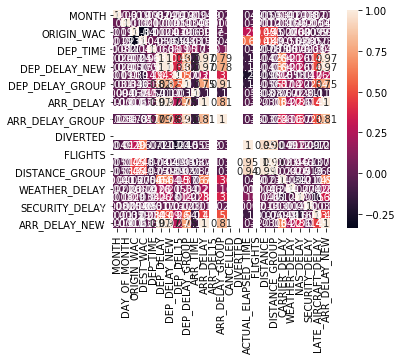

In [19]:
sns.heatmap(dataset.dropna().corr(), square=True, annot=True)